In [1]:
print('ddd')

ddd


In [ ]:
import pandas as pd

df = pd.read_csv("data.csv",sep=";")

In [5]:
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01/12/2020,110,130,409.1
1,60,02/12/2020,117,145,479.0
2,60,03/12/2020,103,135,340.0
3,45,04/12/2020,109,175,282.4
4,45,05/12/2020,117,148,406.0


In [6]:
print(df.isnull().sum())


Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


In [14]:
print("\n" + "="*80)
print("2 ANALYSE DE L'UNICITÉ")
print("="*80)

# Doublons complets
duplicates_all = df.duplicated().sum()
print(f"\nDoublons complets: {duplicates_all}")

if duplicates_all > 0:
    print("\nLignes dupliquées:")
    print(df[df.duplicated(keep=False)].sort_values('Date'))

# Doublons sur la date
duplicates_date = df['Date'].duplicated().sum()
print(f"\nDoublons sur la colonne Date: {duplicates_date}")

if duplicates_date > 0:
    duplicate_dates = df[df['Date'].duplicated(keep=False)].sort_values('Date')
    print("\nDates dupliquées:")
    print(duplicate_dates[['Date', 'Duration', 'Pulse', 'Maxpulse', 'Calories']])



2 ANALYSE DE L'UNICITÉ

Doublons complets: 1

Lignes dupliquées:
    Duration        Date  Pulse  Maxpulse  Calories Date_parsed  \
11        60  12/12/2020    100       120     250.7  2020-12-12   
12        60  12/12/2020    100       120     250.7  2020-12-12   

    Coherence_Pulse  
11             True  
12             True  

Doublons sur la colonne Date: 1

Dates dupliquées:
          Date  Duration  Pulse  Maxpulse  Calories
11  12/12/2020        60    100       120     250.7
12  12/12/2020        60    100       120     250.7


In [15]:
# ============================================================================
# 3. VÉRIFICATION DE LA COHÉRENCE DES RELATIONS
# ============================================================================
print("\n" + "="*80)
print("3 ANALYSE DE LA COHÉRENCE")
print("="*80)

# Conversion de la colonne Date
df['Date_parsed'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Vérification: Maxpulse doit être >= Pulse
df['Coherence_Pulse'] = df['Maxpulse'] >= df['Pulse']
inconsistent_pulse = (~df['Coherence_Pulse']).sum()

print("\nCohérence Pulse vs Maxpulse:")
print(f"   - Incohérences détectées: {inconsistent_pulse}")

if inconsistent_pulse > 0:
    print("\nLignes incohérentes (Maxpulse < Pulse):")
    problematic = df[~df['Coherence_Pulse']][['Date', 'Pulse', 'Maxpulse']]
    print(problematic.to_string(index=False))

# Vérification des plages de valeurs acceptables
print("\nPlages de valeurs:")
print(f"   Duration: {df['Duration'].min():.0f} - {df['Duration'].max():.0f} minutes")
print(f"   Pulse: {df['Pulse'].min():.0f} - {df['Pulse'].max():.0f} bpm")
print(f"   Maxpulse: {df['Maxpulse'].min():.0f} - {df['Maxpulse'].max():.0f} bpm")
print(f"   Calories: {df['Calories'].min():.1f} - {df['Calories'].max():.1f} kcal")

# Taux de cohérence
coherence_rate = (df['Coherence_Pulse'].sum() / len(df)) * 100
print(f"\nTaux de cohérence: {coherence_rate:.2f}%")



3 ANALYSE DE LA COHÉRENCE

Cohérence Pulse vs Maxpulse:
   - Incohérences détectées: 1

Lignes incohérentes (Maxpulse < Pulse):
      Date  Pulse  Maxpulse
23/12/2020    130       101

Plages de valeurs:
   Duration: 30 - 450 minutes
   Pulse: 90 - 130 bpm
   Maxpulse: 101 - 175 bpm
   Calories: 195.1 - 479.0 kcal

Taux de cohérence: 96.88%


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [11]:
# ============================================================================
# 4. MESURE DE L'ACTUALITÉ DES DONNÉES
# ============================================================================
print("\n" + "="*80)
print("4️⃣  ANALYSE DE L'ACTUALITÉ")
print("="*80)

valid_dates = df['Date_parsed'].dropna()

if len(valid_dates) > 0:
    earliest_date = valid_dates.min()
    latest_date = valid_dates.max()
    date_range = (latest_date - earliest_date).days
    
    print(f"\n📅 Période couverte:")
    print(f"   - Date la plus ancienne: {earliest_date.strftime('%d/%m/%Y')}")
    print(f"   - Date la plus récente: {latest_date.strftime('%d/%m/%Y')}")
    print(f"   - Étendue: {date_range} jours")
    
    # Calcul de l'âge des données par rapport à aujourd'hui
    today = datetime.now()
    data_age = (today - latest_date).days
    
    print(f"\n⏰ Actualité:")
    print(f"   - Âge des données les plus récentes: {data_age} jours")
    print(f"   - Année des données: 2020")
    print(f"   - Données datant de: ~{(today.year - 2020)} ans")
    
    # Classification de l'actualité
    if data_age < 30:
        actuality = "✅ EXCELLENTE (< 1 mois)"
    elif data_age < 90:
        actuality = "🟡 BONNE (< 3 mois)"
    elif data_age < 365:
        actuality = "🟠 MOYENNE (< 1 an)"
    else:
        actuality = "🔴 FAIBLE (> 1 an)"
    
    print(f"   - Évaluation: {actuality}")


4️⃣  ANALYSE DE L'ACTUALITÉ

📅 Période couverte:
   - Date la plus ancienne: 01/12/2020
   - Date la plus récente: 31/12/2020
   - Étendue: 30 jours

⏰ Actualité:
   - Âge des données les plus récentes: 1798 jours
   - Année des données: 2020
   - Données datant de: ~5 ans
   - Évaluation: 🔴 FAIBLE (> 1 an)


In [12]:
# ============================================================================
# 5. DÉTECTION DES VALEURS ABERRANTES (EXACTITUDE)
# ============================================================================
print("\n" + "="*80)
print("5️⃣  ANALYSE DE L'EXACTITUDE (Valeurs aberrantes)")
print("="*80)

def detect_outliers_iqr(series, column_name):
    """Détecte les valeurs aberrantes avec la méthode IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    print(f"\n📊 {column_name}:")
    print(f"   - Q1: {Q1:.1f}, Q3: {Q3:.1f}, IQR: {IQR:.1f}")
    print(f"   - Limites acceptables: [{lower_bound:.1f}, {upper_bound:.1f}]")
    print(f"   - Valeurs aberrantes détectées: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"   - Valeurs: {outliers.tolist()}")
    
    return outliers

# Analyse pour chaque colonne numérique
outliers_duration = detect_outliers_iqr(df['Duration'].dropna(), 'Duration')
outliers_pulse = detect_outliers_iqr(df['Pulse'].dropna(), 'Pulse')
outliers_maxpulse = detect_outliers_iqr(df['Maxpulse'].dropna(), 'Maxpulse')
outliers_calories = detect_outliers_iqr(df['Calories'].dropna(), 'Calories')

# Nombre total d'anomalies
total_outliers = len(outliers_duration) + len(outliers_pulse) + len(outliers_maxpulse) + len(outliers_calories)
accuracy_rate = ((len(df) * 4 - total_outliers) / (len(df) * 4)) * 100

print(f"\n✅ Taux d'exactitude: {accuracy_rate:.2f}%")
print(f"   Total d'anomalies détectées: {total_outliers}")


5️⃣  ANALYSE DE L'EXACTITUDE (Valeurs aberrantes)

📊 Duration:
   - Q1: 60.0, Q3: 60.0, IQR: 0.0
   - Limites acceptables: [60.0, 60.0]
   - Valeurs aberrantes détectées: 8
   - Valeurs: [45, 45, 450, 30, 45, 45, 45, 45]

📊 Pulse:
   - Q1: 100.0, Q3: 106.5, IQR: 6.5
   - Limites acceptables: [90.2, 116.2]
   - Valeurs aberrantes détectées: 4
   - Valeurs: [117, 117, 90, 130]

📊 Maxpulse:
   - Q1: 120.0, Q3: 132.2, IQR: 12.2
   - Limites acceptables: [101.6, 150.6]
   - Valeurs aberrantes détectées: 2
   - Valeurs: [175, 101]

📊 Calories:
   - Q1: 250.7, Q3: 344.0, IQR: 93.3
   - Limites acceptables: [110.8, 483.9]
   - Valeurs aberrantes détectées: 0

✅ Taux d'exactitude: 89.06%
   Total d'anomalies détectées: 14



6️⃣  GÉNÉRATION DU TABLEAU DE BORD


NameError: name 'missing_percentage' is not defined

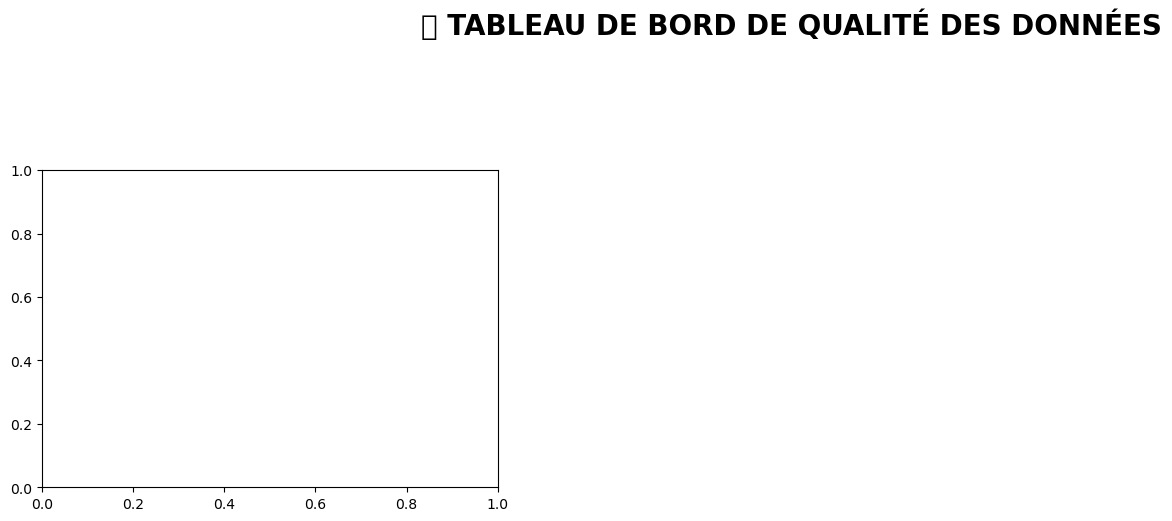

In [13]:

# ============================================================================
# 6. CRÉATION DES VISUALISATIONS
# ============================================================================
print("\n" + "="*80)
print("6️⃣  GÉNÉRATION DU TABLEAU DE BORD")
print("="*80)

# Créer une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(20, 14))
fig.suptitle('📊 TABLEAU DE BORD DE QUALITÉ DES DONNÉES', fontsize=20, fontweight='bold', y=0.995)

# 1. Complétude par colonne
ax1 = plt.subplot(3, 3, 1)
completeness_data = 100 - missing_percentage
colors_completeness = ['#2ecc71' if x == 100 else '#e74c3c' if x < 90 else '#f39c12' for x in completeness_data]
bars1 = ax1.barh(completeness_df['Colonne'], completeness_data, color=colors_completeness, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Taux de complétude (%)', fontsize=10, fontweight='bold')
ax1.set_title('1. Complétude par colonne', fontsize=12, fontweight='bold', pad=10)
ax1.set_xlim(0, 105)
for i, (bar, val) in enumerate(zip(bars1, completeness_data)):
    ax1.text(val + 1, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
             va='center', fontsize=9, fontweight='bold')
ax1.axvline(x=100, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax1.grid(axis='x', alpha=0.3)

# 2. Résumé des métriques de qualité
ax2 = plt.subplot(3, 3, 2)
ax2.axis('off')
metrics = [
    ('Complétude', completeness_rate),
    ('Unicité', uniqueness_rate),
    ('Cohérence', coherence_rate),
    ('Exactitude', accuracy_rate)
]
y_pos = 0.9
for metric_name, metric_value in metrics:
    color = '#2ecc71' if metric_value >= 95 else '#f39c12' if metric_value >= 85 else '#e74c3c'
    ax2.text(0.1, y_pos, f'{metric_name}:', fontsize=12, fontweight='bold')
    ax2.text(0.6, y_pos, f'{metric_value:.1f}%', fontsize=12, fontweight='bold', color=color)
    y_pos -= 0.2
ax2.set_title('2. Métriques de qualité', fontsize=12, fontweight='bold', pad=10)

# 3. Distribution des valeurs manquantes
ax3 = plt.subplot(3, 3, 3)
missing_data = df.isnull().sum()
colors_missing = ['#e74c3c' if x > 0 else '#2ecc71' for x in missing_data]
bars3 = ax3.bar(missing_data.index, missing_data.values, color=colors_missing, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Nombre de valeurs manquantes', fontsize=10, fontweight='bold')
ax3.set_title('3. Valeurs manquantes par colonne', fontsize=12, fontweight='bold', pad=10)
ax3.tick_params(axis='x', rotation=45)
for bar in bars3:
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Box plot - Duration
ax4 = plt.subplot(3, 3, 4)
bp1 = ax4.boxplot(df['Duration'].dropna(), vert=True, patch_artist=True, widths=0.5)
bp1['boxes'][0].set_facecolor('#3498db')
bp1['boxes'][0].set_edgecolor('black')
bp1['boxes'][0].set_linewidth(2)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp1[element], color='black', linewidth=2)
plt.setp(bp1['fliers'], markeredgecolor='red', marker='o', markersize=8, markerfacecolor='red')
ax4.set_ylabel('Minutes', fontsize=10, fontweight='bold')
ax4.set_title('4. Distribution - Duration', fontsize=12, fontweight='bold', pad=10)
ax4.set_xticklabels(['Duration'])
ax4.grid(axis='y', alpha=0.3)

# 5. Box plot - Pulse & Maxpulse
ax5 = plt.subplot(3, 3, 5)
data_pulse = [df['Pulse'].dropna(), df['Maxpulse'].dropna()]
bp2 = ax5.boxplot(data_pulse, labels=['Pulse', 'Maxpulse'], patch_artist=True, widths=0.5)
colors_bp = ['#e74c3c', '#9b59b6']
for patch, color in zip(bp2['boxes'], colors_bp):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp2[element], color='black', linewidth=2)
plt.setp(bp2['fliers'], markeredgecolor='red', marker='o', markersize=8, markerfacecolor='red')
ax5.set_ylabel('BPM', fontsize=10, fontweight='bold')
ax5.set_title('5. Distribution - Pulse & Maxpulse', fontsize=12, fontweight='bold', pad=10)
ax5.grid(axis='y', alpha=0.3)

# 6. Box plot - Calories
ax6 = plt.subplot(3, 3, 6)
bp3 = ax6.boxplot(df['Calories'].dropna(), vert=True, patch_artist=True, widths=0.5)
bp3['boxes'][0].set_facecolor('#f39c12')
bp3['boxes'][0].set_edgecolor('black')
bp3['boxes'][0].set_linewidth(2)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp3[element], color='black', linewidth=2)
plt.setp(bp3['fliers'], markeredgecolor='red', marker='o', markersize=8, markerfacecolor='red')
ax6.set_ylabel('Kcal', fontsize=10, fontweight='bold')
ax6.set_title('6. Distribution - Calories', fontsize=12, fontweight='bold', pad=10)
ax6.set_xticklabels(['Calories'])
ax6.grid(axis='y', alpha=0.3)

# 7. Heatmap des valeurs manquantes
ax7 = plt.subplot(3, 3, 7)
missing_matrix = df.isnull().astype(int)
sns.heatmap(missing_matrix.T, cbar=True, cmap=['#2ecc71', '#e74c3c'], 
            ax=ax7, linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Manquant (1) / Présent (0)'})
ax7.set_xlabel('Index des lignes', fontsize=10, fontweight='bold')
ax7.set_ylabel('Colonnes', fontsize=10, fontweight='bold')
ax7.set_title('7. Carte des valeurs manquantes', fontsize=12, fontweight='bold', pad=10)

# 8. Histogramme des valeurs aberrantes
ax8 = plt.subplot(3, 3, 8)
outliers_count = [len(outliers_duration), len(outliers_pulse), len(outliers_maxpulse), len(outliers_calories)]
columns_names = ['Duration', 'Pulse', 'Maxpulse', 'Calories']
colors_outliers = ['#e74c3c' if x > 0 else '#2ecc71' for x in outliers_count]
bars8 = ax8.bar(columns_names, outliers_count, color=colors_outliers, edgecolor='black', linewidth=1.5)
ax8.set_ylabel('Nombre de valeurs aberrantes', fontsize=10, fontweight='bold')
ax8.set_title('8. Valeurs aberrantes détectées (IQR)', fontsize=12, fontweight='bold', pad=10)
ax8.tick_params(axis='x', rotation=45)
for bar in bars8:
    height = bar.get_height()
    if height > 0:
        ax8.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

# 9. Score global de qualité (Gauge)
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')
overall_score = (completeness_rate + uniqueness_rate + coherence_rate + accuracy_rate) / 4

# Créer un gauge circulaire
theta = np.linspace(0, np.pi, 100)
r = 1
x = r * np.cos(theta)
y = r * np.sin(theta)

# Arc de fond
ax9.plot(x, y, 'gray', linewidth=20, alpha=0.3)

# Arc coloré selon le score
score_theta = np.linspace(0, np.pi * (overall_score/100), 100)
score_x = r * np.cos(score_theta)
score_y = r * np.sin(score_theta)

if overall_score >= 90:
    color_score = '#2ecc71'
    rating = 'EXCELLENT'
elif overall_score >= 75:
    color_score = '#f39c12'
    rating = 'BON'
elif overall_score >= 60:
    color_score = '#e67e22'
    rating = 'MOYEN'
else:
    color_score = '#e74c3c'
    rating = 'FAIBLE'

ax9.plot(score_x, score_y, color_score, linewidth=20)

# Affichage du score
ax9.text(0, -0.3, f'{overall_score:.1f}%', ha='center', va='center', 
         fontsize=36, fontweight='bold', color=color_score)
ax9.text(0, -0.6, rating, ha='center', va='center', 
         fontsize=16, fontweight='bold', color=color_score)
ax9.set_title('9. Score global de qualité', fontsize=12, fontweight='bold', pad=10)
ax9.set_xlim(-1.5, 1.5)
ax9.set_ylim(-1, 1.5)

plt.tight_layout()
plt.savefig('/home/user/dashboard_qualite_donnees.png', dpi=300, bbox_inches='tight', facecolor='white')
print("\n✅ Dashboard sauvegardé: dashboard_qualite_donnees.png")

# ============================================================================
# GÉNÉRATION DU RAPPORT DÉTAILLÉ
# ============================================================================
print("\n" + "="*80)
print("📝 GÉNÉRATION DU RAPPORT DÉTAILLÉ")
print("="*80)

# Créer un rapport texte détaillé
report = f"""
{'='*80}
RAPPORT D'ANALYSE DE QUALITÉ DES DONNÉES
{'='*80}
Date de génération: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}
Fichier analysé: exemple_DQ.csv
Nombre d'enregistrements: {len(df)}
Nombre de colonnes: {len(df.columns)}

{'='*80}
1. COMPLÉTUDE - {completeness_rate:.2f}%
{'='*80}
{completeness_df.to_string(index=False)}

Interprétation:
- Date: {missing_percentage['Date']:.1f}% de valeurs manquantes
- Calories: {missing_percentage['Calories']:.1f}% de valeurs manquantes
{"- Autres colonnes complètes à 100%" if missing_percentage['Duration'] == 0 else ""}

{'='*80}
2. UNICITÉ - {uniqueness_rate:.2f}%
{'='*80}
- Doublons complets: {duplicates_all} ligne(s)
- Doublons sur la date: {duplicates_date} occurrence(s)
- Enregistrements uniques: {len(df) - duplicates_all}

{'='*80}
3. COHÉRENCE - {coherence_rate:.2f}%
{'='*80}
- Incohérences Pulse/Maxpulse: {inconsistent_pulse} cas
- Plage Duration: {df['Duration'].min():.0f} - {df['Duration'].max():.0f} min
- Plage Pulse: {df['Pulse'].min():.0f} - {df['Pulse'].max():.0f} bpm
- Plage Maxpulse: {df['Maxpulse'].min():.0f} - {df['Maxpulse'].max():.0f} bpm
- Plage Calories: {df['Calories'].min():.1f} - {df['Calories'].max():.1f} kcal

{'='*80}
4. ACTUALITÉ
{'='*80}
- Période: {earliest_date.strftime('%d/%m/%Y')} au {latest_date.strftime('%d/%m/%Y')}
- Étendue: {date_range} jours
- Âge des données: ~{(today.year - 2020)} ans
- Évaluation: {actuality}

{'='*80}
5. EXACTITUDE - {accuracy_rate:.2f}%
{'='*80}
Valeurs aberrantes détectées (méthode IQR):
- Duration: {len(outliers_duration)} valeur(s)
- Pulse: {len(outliers_pulse)} valeur(s)
- Maxpulse: {len(outliers_maxpulse)} valeur(s)
- Calories: {len(outliers_calories)} valeur(s)
Total: {total_outliers} anomalies

{'='*80}
6. SCORE GLOBAL DE QUALITÉ: {overall_score:.2f}% - {rating}
{'='*80}
Détail:
- Complétude: {completeness_rate:.2f}%
- Unicité: {uniqueness_rate:.2f}%
- Cohérence: {coherence_rate:.2f}%
- Exactitude: {accuracy_rate:.2f}%

{'='*80}
RECOMMANDATIONS
{'='*80}
"""

recommendations = []

if missing_percentage['Date'] > 0:
    recommendations.append("🔴 CRITIQUE: Traiter les dates manquantes - essentiel pour l'analyse temporelle")

if missing_percentage['Calories'] > 0:
    recommendations.append("🟡 MOYEN: Imputer ou documenter les valeurs manquantes de Calories")

if duplicates_all > 0:
    recommendations.append(f"🔴 CRITIQUE: Supprimer ou fusionner {duplicates_all} doublon(s) complet(s)")

if duplicates_date > 0:
    recommendations.append(f"🟠 IMPORTANT: Vérifier {duplicates_date} doublon(s) de dates")

if inconsistent_pulse > 0:
    recommendations.append(f"🔴 CRITIQUE: Corriger {inconsistent_pulse} incohérence(s) Pulse/Maxpulse")

if data_age > 365:
    recommendations.append("🟡 MOYEN: Données datant de plus d'un an - vérifier la pertinence")

if len(outliers_duration) > 0:
    recommendations.append(f"🟠 IMPORTANT: Investiguer {len(outliers_duration)} valeur(s) aberrante(s) de Duration")

if len(outliers_pulse) > 0:
    recommendations.append(f"🟠 IMPORTANT: Vérifier {len(outliers_pulse)} valeur(s) aberrante(s) de Pulse")

if not recommendations:
    recommendations.append("✅ Aucune action critique requise - qualité acceptable")

for i, rec in enumerate(recommendations, 1):
    report += f"{i}. {rec}\n"

report += f"\n{'='*80}\n"
report += "FIN DU RAPPORT\n"
report += f"{'='*80}\n"

# Sauvegarder le rapport
with open('/home/user/rapport_qualite_donnees.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("\n✅ Rapport sauvegardé: rapport_qualite_donnees.txt")

print("\n" + "="*80)
print("✅ ANALYSE TERMINÉE AVEC SUCCÈS")
print("="*80)
print("\nFichiers générés:")
print("1. 📊 dashboard_qualite_donnees.png - Tableau de bord visuel")
print("2. 📝 rapport_qualite_donnees.txt - Rapport détaillé")
print(f"\n🎯 Score global de qualité: {overall_score:.2f}% - {rating}")